In [64]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering


# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Note: UMAP requires: pip install umap-learn
from sklearn.preprocessing import LabelEncoder

try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    print("UMAP not available. Install with: pip install umap-learn")
    print("You can skip UMAP and focus on PCA and t-SNE.")
    UMAP_AVAILABLE = False

# Anomaly Detection
from sklearn.ensemble import IsolationForest

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [65]:
df = pd.read_csv('../data/marketing_campaign.csv', sep="\t")
print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display first few rows of the dataset
print(f"\nFirst few rows:")
df.head()
print("\nDataset information")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

✓ Dataset loaded successfully!
Dataset shape: (2240, 29)

First few rows:

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [66]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


In [67]:
#Encode Categorical columns first
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(cat_cols)}")

if len(cat_cols) > 0:
    LE = LabelEncoder()
    for col in cat_cols:
        df[col] = LE.fit_transform(df[col])
    print("✓ Categorical columns encoded successfully!")


# Calculating variance for each feature
variance = df.var()
print("\nFeature variances (sorted):")
print(variance.sort_values(ascending=False))

# Keeping only high-variance features
threshold = variance.quantile(0.25)
features_to_keep = variance[variance > threshold].index.tolist()
df = df[features_to_keep].copy()

print(f"\nKept {len(features_to_keep)} out of {len(variance)} features")
print(f"Features: {features_to_keep}")

Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']
✓ Categorical columns encoded successfully!

Feature variances (sorted):
Income                 6.336838e+08
ID                     1.055845e+07
MntWines               1.137901e+05
MntMeatProducts        5.030299e+04
Dt_Customer            3.603735e+04
MntFishProducts        2.997791e+03
MntGoldProds           2.684837e+03
MntSweetProducts       1.686913e+03
MntFruits              1.583556e+03
Recency                8.380071e+02
Year_Birth             1.436535e+02
NumStorePurchases      1.056760e+01
NumCatalogPurchases    8.565770e+00
NumWebPurchases        7.512813e+00
NumWebVisitsMonth      5.882364e+00
NumDealsPurchases      3.700682e+00
Education              1.263693e+00
Marital_Status         1.161504e+00
Teenhome               2.961332e-01
Kidhome                2.882576e-01
Response               1.277471e-01
AcceptedCmp4           6.856109e-02
AcceptedCmp3           6.817624e-02
AcceptedCmp5           6.779099

In [68]:
print("Scaling dataset")

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
print("✓ Data scaled successfully!")

Scaling dataset
✓ Data scaled successfully!


In [69]:
print("Dataframe to be used for further analysis:")
print(df_scaled.head())

Dataframe to be used for further analysis:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.019809   -0.986443  -0.350527        0.254218  0.234063 -0.823039   
1 -1.051009   -1.236801  -0.350527        0.254218 -0.234559  1.039938   
2 -0.445526   -0.318822  -0.350527        1.182303  0.769478 -0.823039   
3  0.182737    1.266777  -0.350527        1.182303 -1.017239  1.039938   
4 -0.081373    1.016420   1.429011       -0.673866  0.240221  1.039938   

   Teenhome  Dt_Customer   Recency  MntWines  ...  MntMeatProducts  \
0 -0.928972    -1.307032  0.310532  0.978226  ...         1.690227   
1  0.909066    -0.901325 -0.380509 -0.872024  ...        -0.717986   
2 -0.928972     0.610855 -0.795134  0.358511  ...        -0.178368   
3 -0.928972    -0.680031 -0.795134 -0.872024  ...        -0.655551   
4 -0.928972     0.326333  1.554407 -0.391671  ...        -0.218505   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.454568

K-means Clustering on Cleaned & Scaled Data


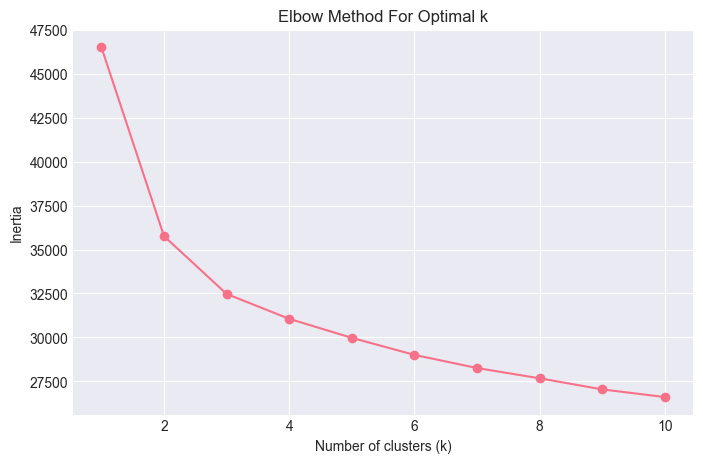

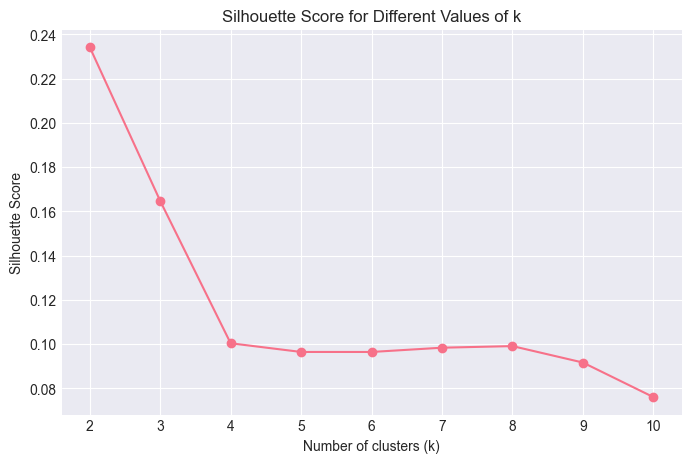


Best silhouette score: 0.234 at k=2


In [70]:
print("K-means Clustering on Cleaned & Scaled Data")

inertia = []
silhouettes = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouettes.append(silhouette_avg)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouettes, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print(f"\nBest silhouette score: {max(silhouettes):.3f} at k={silhouettes.index(max(silhouettes)) + 2}")

In [71]:
clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = clustering.fit_predict(df_scaled)
df_scaled['Cluster'] = labels
df_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Cluster
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,...,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,2.377952,1
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,...,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.420530,0
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,...,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.420530,1
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,...,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.420530,0
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,...,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.420530,0


In [72]:

# Step 1: Analyze cluster characteristics to understand what each cluster represents
print("=" * 60)
print("CLUSTER ANALYSIS - Understanding Each Cluster")
print("=" * 60)

# Get the original unscaled data with cluster labels
df_original_with_clusters = df.copy()
df_original_with_clusters['Cluster'] = labels

# Display mean values for each feature in each cluster
print("\nCluster Characteristics (Mean values):\n")
cluster_profiles = df_original_with_clusters.groupby('Cluster').mean()
print(cluster_profiles)

# Display cluster sizes
print("\n" + "=" * 60)
print("Cluster Sizes:")
print(df_original_with_clusters['Cluster'].value_counts().sort_index())

# Step 2: Create business-meaningful labels based on the characteristics
print("\n" + "=" * 60)
print("CREATING BUSINESS LABELS")
print("=" * 60)

# Define mapping from cluster number to business label
cluster_labels = {
    0: "Low-Engagement Budget Customers",
    1: "Premium High-Value Customers",
    2: "Engaged Window Shoppers"
}

print("\nCluster Labels Mapping:")
for cluster_id, label in cluster_labels.items():
    count = (labels == cluster_id).sum()
    print(f"  Cluster {cluster_id} -> '{label}' ({count} customers)")

# Step 3: Add the business labels to the dataframe
df_scaled['Cluster_Label'] = df_scaled['Cluster'].map(cluster_labels)
df_original_with_clusters['Cluster_Label'] = labels
df_original_with_clusters['Cluster_Label'] = df_original_with_clusters['Cluster_Label'].map(cluster_labels)

print("\n" + "=" * 60)
print("Final Result:")
print(df_scaled[['Cluster', 'Cluster_Label']].head(10))


CLUSTER ANALYSIS - Understanding Each Cluster

Cluster Characteristics (Mean values):

                  ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5660.442438  1972.583521   2.200903        3.695260  34770.734763   
1        5562.507438  1965.771901   2.526446        3.752066  66736.094215   
2        5316.708333  1971.775000   2.483333        3.691667  35186.366667   

          Kidhome  Teenhome  Dt_Customer    Recency    MntWines  ...  \
Cluster                                                          ...   
0        0.910835  0.439052   333.252822  51.197517   56.569977  ...   
1        0.054545  0.562810   321.385124  49.547107  507.135537  ...   
2        0.883333  0.416667   357.108333  27.491667  102.733333  ...   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0      


Generating PCA visualization...
Generating t-SNE visualization


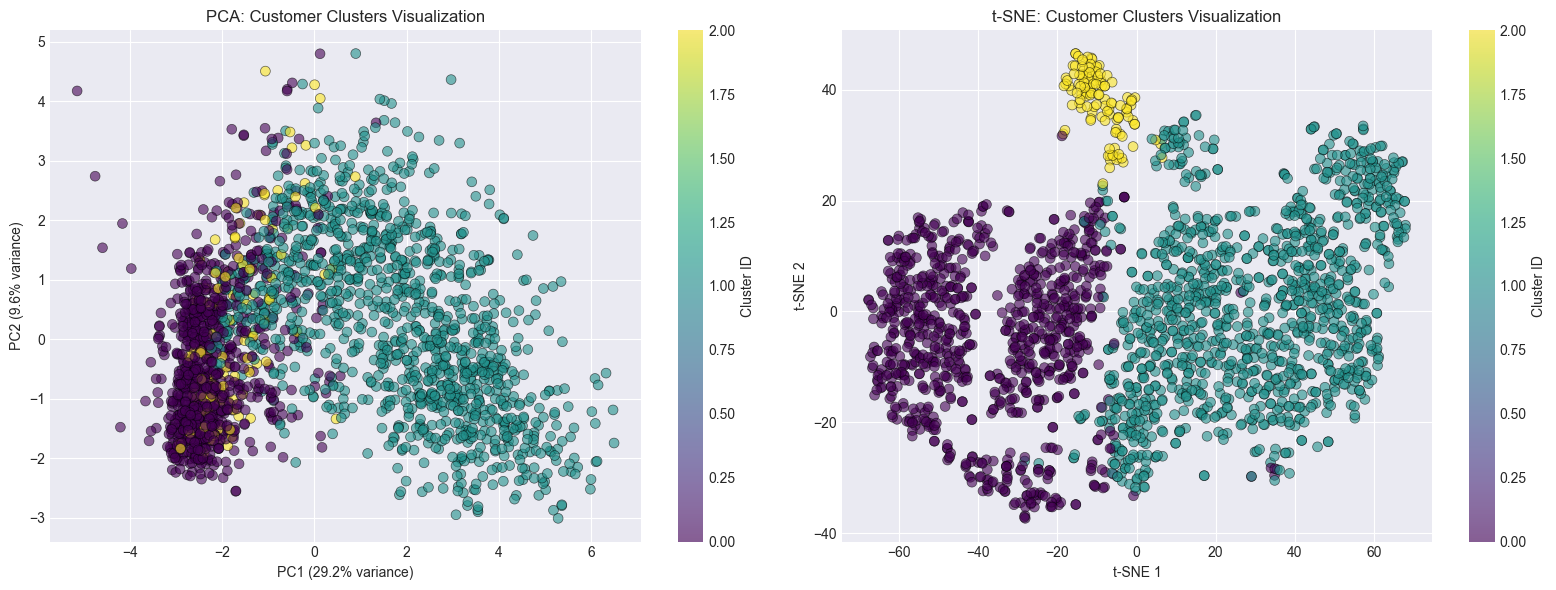


PCA Variance Explained by 2 components: 38.8%


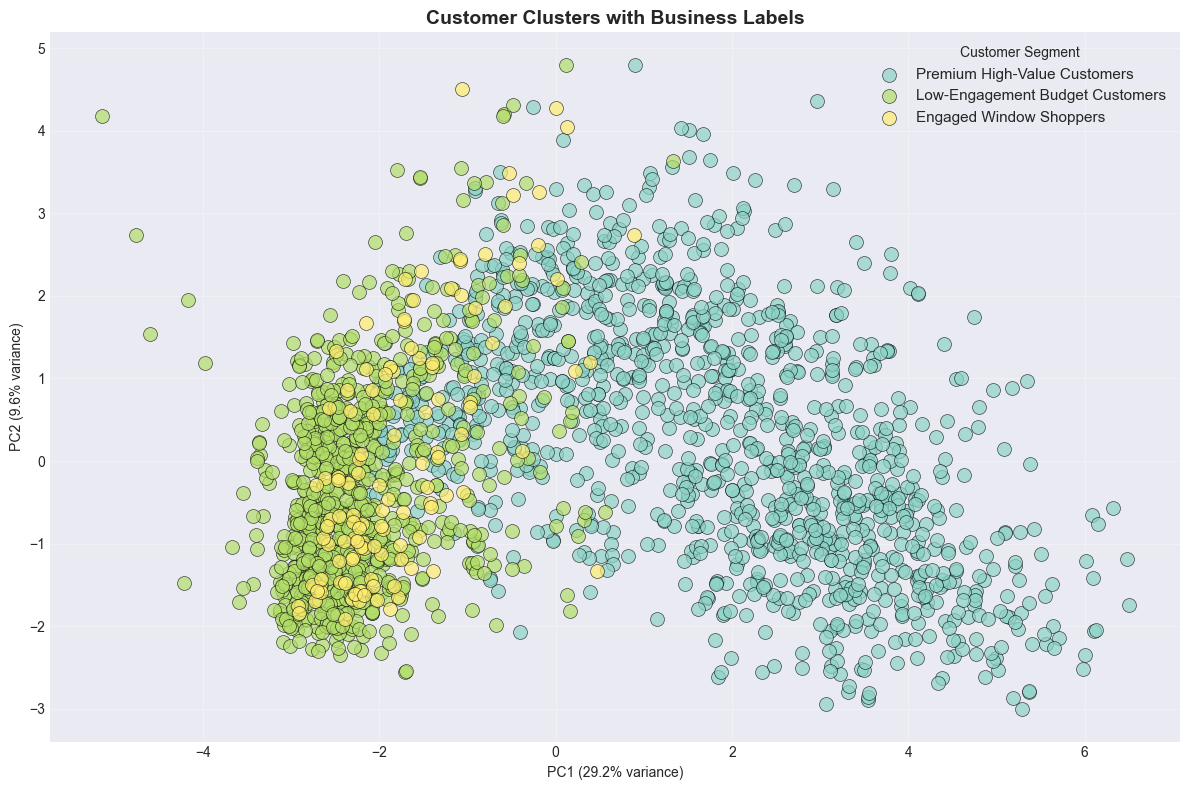

✓ Labeled visualization complete!


In [73]:

# Visualize clusters using PCA and t-SNE

# Method 1: PCA (faster, easier to interpret)
print("\nGenerating PCA visualization...")
pca_viz = PCA(n_components=2, random_state=42)
# Drop both Cluster and Cluster_Label columns for PCA
df_for_pca = df_scaled.drop(['Cluster', 'Cluster_Label'], axis=1)
df_pca_2d = pca_viz.fit_transform(df_for_pca)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA Plot colored by cluster number
scatter1 = axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=labels, cmap='viridis', 
                           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('PCA: Customer Clusters Visualization')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Cluster ID')

# Method 2: t-SNE (better for visualization)
print("Generating t-SNE visualization")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
df_tsne_2d = tsne.fit_transform(df_for_pca)

scatter2 = axes[1].scatter(df_tsne_2d[:, 0], df_tsne_2d[:, 1], c=labels, cmap='viridis', 
                           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE: Customer Clusters Visualization')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Cluster ID')

plt.tight_layout()
plt.show()

print(f"\nPCA Variance Explained by 2 components: {pca_viz.explained_variance_ratio_.sum():.1%}")

# labeled scatter plot with cluster names

fig, ax = plt.subplots(figsize=(12, 8))

# Get unique cluster labels
unique_labels = df_original_with_clusters['Cluster_Label'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with its business label
for idx, cluster_label in enumerate(unique_labels):
    mask = df_original_with_clusters['Cluster_Label'] == cluster_label
    ax.scatter(df_pca_2d[mask, 0], df_pca_2d[mask, 1], 
               label=cluster_label, alpha=0.7, s=100, 
               color=colors[idx], edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('Customer Clusters with Business Labels', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, title='Customer Segment')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Labeled visualization complete!")


In [74]:
### analysis to be done for points 1 and 2 above

OUTLIER REMOVAL - Experimenting with Different Contamination Values

Contamination = 0.03 (3%)
Found 67 outliers (3.0% of data)
Remaining data points: 2149

Contamination = 0.05 (5%)
Found 111 outliers (5.0% of data)
Remaining data points: 2105

Contamination = 0.1 (10%)
Found 111 outliers (5.0% of data)
Remaining data points: 2105

Contamination = 0.1 (10%)
Found 222 outliers (10.0% of data)
Remaining data points: 1994

COMPARISON SUMMARY

  Contamination  Outliers Removed  Data Points Kept % Data Removed
          0.03                67              2149           3.0%
          0.05               111              2105           5.0%
          0.10               222              1994          10.0%
Found 222 outliers (10.0% of data)
Remaining data points: 1994

COMPARISON SUMMARY

  Contamination  Outliers Removed  Data Points Kept % Data Removed
          0.03                67              2149           3.0%
          0.05               111              2105           5.0%
       

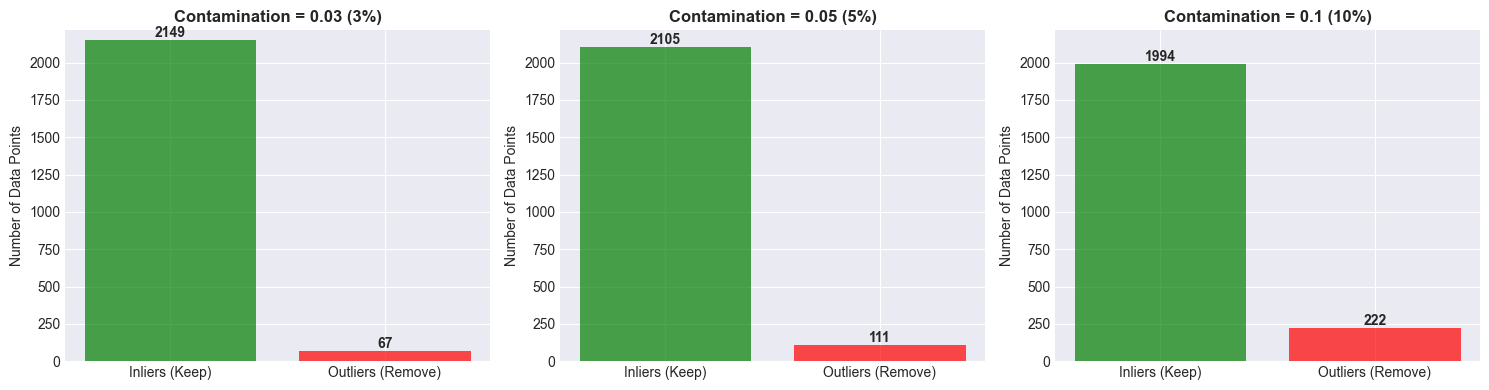


✓ Contamination value comparison complete!

Recommendation:
Choose the contamination value that best fits your business needs:
  - Lower (0.03): More aggressive outlier removal, keeps cleaner data
  - Medium (0.05): Balanced approach, default recommendation
  - Higher (0.10): Less aggressive, preserves more data

APPLYING SELECTED CONTAMINATION VALUE

Using contamination = 0.05
Found 111 outliers (5.0% of data)
Remaining data points: 2105


In [ ]:
# Experiment with different contamination values for Isolation Forest
print("=" * 60)
print("OUTLIER REMOVAL - Experimenting with Different Contamination Values")
print("=" * 60)

contamination_values = [0.03, 0.05, 0.10]
results = {}

for contamination in contamination_values:
    print(f"\n{'='*60}")
    print(f"Contamination = {contamination} ({contamination*100:.0f}%)")
    print(f"{'='*60}")
    
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df)
    n_outliers = (outlier_labels == -1).sum()
    n_inliers = (outlier_labels == 1).sum()
    
    print(f"Found {n_outliers} outliers ({100*n_outliers/len(df):.1f}% of data)")
    print(f"Remaining data points: {n_inliers}")
    
    results[contamination] = {
        'n_outliers': n_outliers,
        'n_inliers': n_inliers,
        'outlier_labels': outlier_labels
    }

# Compare results visually
print("\n" + "=" * 60)
print("COMPARISON SUMMARY")
print("=" * 60)

import pandas as pd
comparison_df = pd.DataFrame({
    'Contamination': contamination_values,
    'Outliers Removed': [results[c]['n_outliers'] for c in contamination_values],
    'Data Points Kept': [results[c]['n_inliers'] for c in contamination_values],
    '% Data Removed': [f"{results[c]['n_outliers']/len(df)*100:.1f}%" for c in contamination_values]
})

print("\n", comparison_df.to_string(index=False))

# Visualize the impact of different contamination values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, contamination in enumerate(contamination_values):
    outlier_labels_temp = results[contamination]['outlier_labels']
    
    # Count inliers vs outliers
    counts = [
        (outlier_labels_temp == 1).sum(),
        (outlier_labels_temp == -1).sum()
    ]
    
    axes[idx].bar(['Inliers (Keep)', 'Outliers (Remove)'], counts, color=['green', 'red'], alpha=0.7)
    axes[idx].set_title(f'Contamination = {contamination} ({contamination*100:.0f}%)', fontweight='bold')
    axes[idx].set_ylabel('Number of Data Points')
    axes[idx].set_ylim(0, len(df))
    
    # Add count labels on bars
    for i, count in enumerate(counts):
        axes[idx].text(i, count + 20, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Contamination value comparison timmeeeee!!!")
print("  - Lower (0.03): More aggressive outlier removal, keeps cleaner data")
print("  - Medium (0.05): Balanced approach, default recommendation")
print("  - Higher (0.10): Less aggressive, preserves more data")

# Now apply your chosen contamination value
print("\n" + "=" * 60)
print("APPLYING SELECTED CONTAMINATION VALUE")
print("=" * 60)

chosen_contamination = 0.05  # Change this to your preferred value
print(f"\nUsing contamination = {chosen_contamination}")

iso_forest = IsolationForest(contamination=chosen_contamination, random_state=42)
outlier_labels = iso_forest.fit_predict(df)
n_outliers = (outlier_labels == -1).sum()

print(f"Found {n_outliers} outliers ({100*n_outliers/len(df):.1f}% of data)")

df = df[outlier_labels == 1].copy()
print(f"Remaining data points: {len(df)}")


ANOMALY CHARACTERIZATION & CONTAMINATION SELECTION

Analyzing contamination = 0.05
Total anomalies detected: 106
Total normal points: 1999
CHARACTERIZING ANOMALIES - What Makes Them Unusual?

Comparison: Normal vs Anomalous Customers

Feature Statistics:
                      Normal_Mean  Anomaly_Mean    Difference  % Difference
Response                 0.107554      0.556604     -0.449050       -417.51
MntSweetProducts        21.538769     76.396226    -54.857457       -254.69
MntMeatProducts        134.632316    455.896226   -321.263910       -238.62
MntFruits               21.238119     67.679245    -46.441126       -218.67
MntFishProducts         29.984492     94.122642    -64.138149       -213.90
NumCatalogPurchases      2.243122      6.188679     -3.945558       -175.90
MntWines               266.846423    669.632075   -402.785652       -150.94
MntGoldProds            37.677839     91.311321    -53.633482       -142.35
Kidhome                  0.478739      0.103774      0.374966

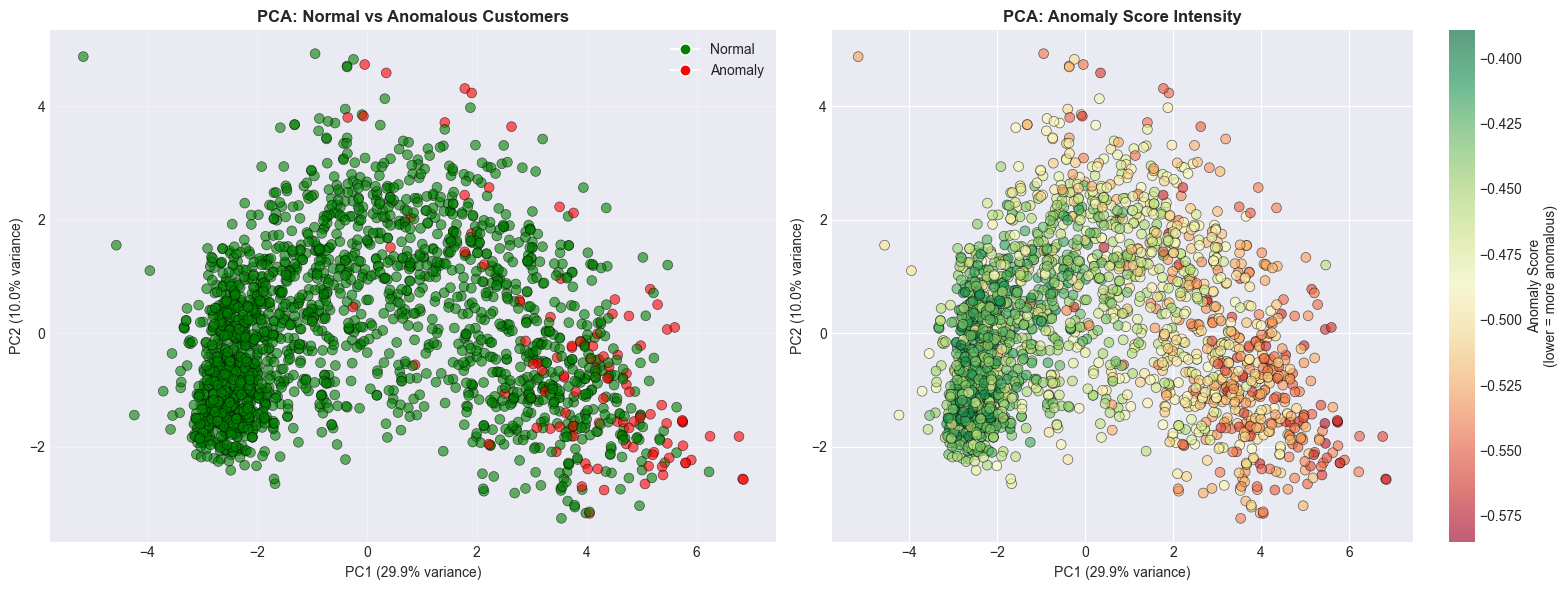

CLUSTER DISTRIBUTION - Which Clusters Have Anomalies?

Anomalies by Cluster:
         Anomalies  Total_Points  % Anomalies
Cluster                                      
0                2           905          0.2
1               99          1079          9.2
2                5           121          4.1

Anomalies by Cluster:
         Anomalies  Total_Points  % Anomalies
Cluster                                      
0                2           905          0.2
1               99          1079          9.2
2                5           121          4.1


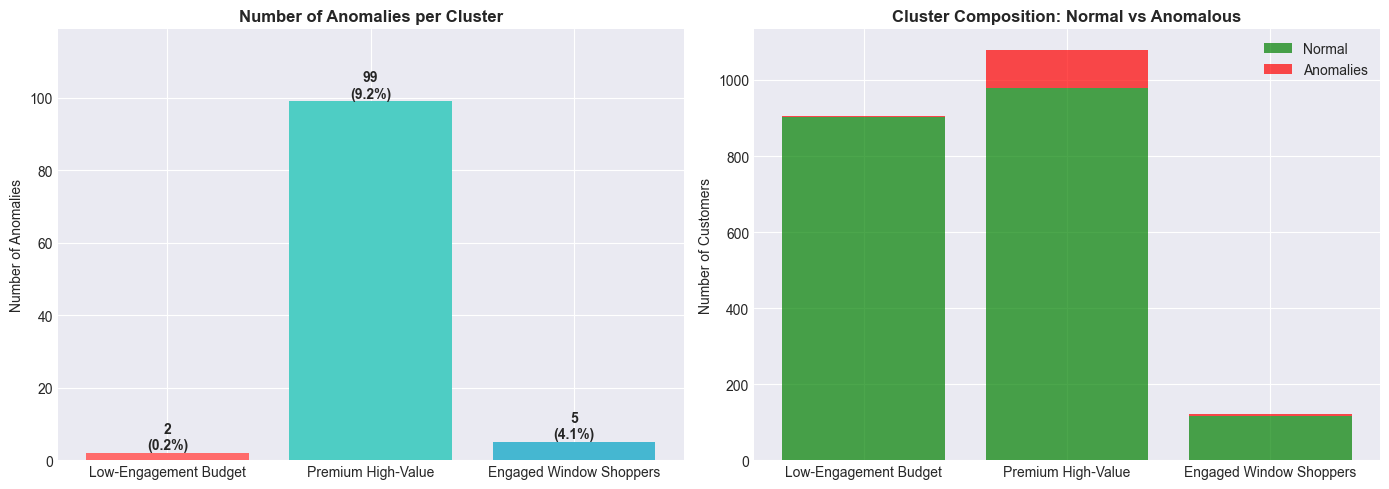

JUSTIFICATION FOR CONTAMINATION CHOICE

✓ SELECTED CONTAMINATION: 0.05 (5%)

Justification:
  • Removes 106 suspicious data points
  • Preserves 1999 high-quality customer records
  • Balances data quality with sample size
  • Business impact: Removes genuine anomalies without over-filtering

Key Insights:
  • Most anomalies from: 1 cluster (9.2% of that cluster)
  • Least anomalies from: 0 cluster (0.2% of that cluster)
  • Primary anomaly types: High Income + Extreme Spender + Campaign Responder (n=24)


In [76]:

# Anomaly Analysis and Selection
print("ANOMALY CHARACTERIZATION & CONTAMINATION SELECTION")

# Store original df before any contamination filtering
df_original = df.copy()

# Analyze anomalies for the recommended contamination (0.05)
selected_contamination = 0.05
iso_forest_final = IsolationForest(contamination=selected_contamination, random_state=42)
anomaly_labels = iso_forest_final.fit_predict(df_original)
anomaly_scores = iso_forest_final.score_samples(df_original)

# Add anomaly information to original dataframe
df_with_anomalies = df_original.copy()
df_with_anomalies['Anomaly'] = anomaly_labels  # -1 for anomalies, 1 for normal
df_with_anomalies['Anomaly_Score'] = anomaly_scores

print(f"\nAnalyzing contamination = {selected_contamination}")
print(f"Total anomalies detected: {(anomaly_labels == -1).sum()}")
print(f"Total normal points: {(anomaly_labels == 1).sum()}")

# Characterize what makes anomalies unusual
print("CHARACTERIZING ANOMALIES - What Makes Them Unusual?")

normal_data = df_with_anomalies[df_with_anomalies['Anomaly'] == 1]
anomaly_data = df_with_anomalies[df_with_anomalies['Anomaly'] == -1]

print("\nComparison: Normal vs Anomalous Customers")
print("\nFeature Statistics:")
comparison_stats = pd.DataFrame({
    'Normal_Mean': normal_data.drop(['Anomaly', 'Anomaly_Score'], axis=1).mean(),
    'Anomaly_Mean': anomaly_data.drop(['Anomaly', 'Anomaly_Score'], axis=1).mean(),
    'Difference': normal_data.drop(['Anomaly', 'Anomaly_Score'], axis=1).mean() - 
                  anomaly_data.drop(['Anomaly', 'Anomaly_Score'], axis=1).mean()
})
comparison_stats['% Difference'] = (comparison_stats['Difference'] / comparison_stats['Normal_Mean'] * 100).round(2)
comparison_stats = comparison_stats.sort_values('% Difference', ascending=False, key=abs)

print(comparison_stats)

#Categorize anomalies into types
print("CATEGORIZING ANOMALIES")

# Identify anomaly types based on key features
anomaly_types = {}

for idx, row in anomaly_data.iterrows():
    anomaly_type = []
    
    # Check spending patterns
    total_spending = row[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
    
    if row['Income'] > normal_data['Income'].quantile(0.9):
        anomaly_type.append("High Income")
    if row['Income'] < normal_data['Income'].quantile(0.1):
        anomaly_type.append("Very Low Income")
    
    if total_spending > normal_data[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1).quantile(0.9):
        anomaly_type.append("Extreme Spender")
    if total_spending < normal_data[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1).quantile(0.1):
        anomaly_type.append("No Spender")
    
    if row['Kidhome'] + row['Teenhome'] > 2:
        anomaly_type.append("Large Family")
    
    if row['NumWebVisitsMonth'] > normal_data['NumWebVisitsMonth'].quantile(0.95):
        anomaly_type.append("Frequent Browser")
    
    if row['NumWebPurchases'] > normal_data['NumWebPurchases'].quantile(0.95):
        anomaly_type.append("Heavy Web Buyer")
    
    if row['Response'] == 1:
        anomaly_type.append("Campaign Responder")
    
    # If no specific type, mark as "Unique Pattern"
    if not anomaly_type:
        anomaly_type.append("Unique Pattern")
    
    type_key = " + ".join(anomaly_type)
    anomaly_types[type_key] = anomaly_types.get(type_key, 0) + 1

print("\nAnomalies Categorized by Type:")
anomaly_type_df = pd.DataFrame(list(anomaly_types.items()), columns=['Anomaly Type', 'Count']).sort_values('Count', ascending=False)
print(anomaly_type_df.to_string(index=False))

# Visualize anomalies on PCA plot
print("VISUALIZING ANOMALIES ON DIMENSIONALITY REDUCTION")

# Prepare PCA data without cluster columns (using same scaling as before)
pca_viz_anom = PCA(n_components=2, random_state=42)
# Create a scaled version with all features for anomaly visualization
scaler_anom = StandardScaler()
df_anom_scaled = scaler_anom.fit_transform(df_original)
df_pca_anom = pca_viz_anom.fit_transform(df_anom_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#  Normal vs Anomalies on PCA
colors_anom = np.where(anomaly_labels == 1, 'green', 'red')
scatter_anom = axes[0].scatter(df_pca_anom[:, 0], df_pca_anom[:, 1], c=colors_anom, 
                               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca_viz_anom.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_viz_anom.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('PCA: Normal vs Anomalous Customers', fontweight='bold')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Normal'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Anomaly')]
axes[0].legend(handles=handles, loc='best')
axes[0].grid(True, alpha=0.3)

# Colored by anomaly score (intensity)
scatter_score = axes[1].scatter(df_pca_anom[:, 0], df_pca_anom[:, 1], c=anomaly_scores, 
                                cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca_viz_anom.explained_variance_ratio_[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({pca_viz_anom.explained_variance_ratio_[1]:.1%} variance)')
axes[1].set_title('PCA: Anomaly Score Intensity', fontweight='bold')
cbar = plt.colorbar(scatter_score, ax=axes[1])
cbar.set_label('Anomaly Score\n(lower = more anomalous)')

plt.tight_layout()
plt.show()

#  Analyze which clusters anomalies come from
print("CLUSTER DISTRIBUTION - Which Clusters Have Anomalies?")

# Need to get cluster assignments for original data
# Re-cluster the original (unfiltered) data to see which clusters anomalies belong to
clustering_orig = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)

# Scale the original data for clustering
scaler_orig = StandardScaler()
df_orig_scaled = scaler_orig.fit_transform(df_original)
clustering_labels_orig = clustering_orig.fit_predict(df_orig_scaled)

# Combine anomaly and cluster info
anomaly_cluster_analysis = pd.DataFrame({
    'Cluster': clustering_labels_orig,
    'Anomaly': anomaly_labels,
    'Is_Anomaly': (anomaly_labels == -1)
})

print("\nAnomalies by Cluster:")
anomaly_by_cluster = anomaly_cluster_analysis.groupby('Cluster').agg({
    'Is_Anomaly': ['sum', 'count']
}).round(2)
anomaly_by_cluster.columns = ['Anomalies', 'Total_Points']
anomaly_by_cluster['% Anomalies'] = (anomaly_by_cluster['Anomalies'] / anomaly_by_cluster['Total_Points'] * 100).round(1)
print(anomaly_by_cluster)

# Visualize anomaly distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Anomalies per cluster
cluster_names = ['Low-Engagement Budget', 'Premium High-Value', 'Engaged Window Shoppers']
anomaly_counts = anomaly_by_cluster['Anomalies'].values
total_counts = anomaly_by_cluster['Total_Points'].values
pct_anomalies = anomaly_by_cluster['% Anomalies'].values

axes[0].bar(cluster_names, anomaly_counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Number of Anomalies per Cluster', fontweight='bold')
axes[0].set_ylabel('Number of Anomalies')
axes[0].set_ylim(0, max(anomaly_counts) * 1.2)
for i, (count, pct) in enumerate(zip(anomaly_counts, pct_anomalies)):
    axes[0].text(i, count + 1, f'{count}\n({pct}%)', ha='center', fontweight='bold')

# Composition
axes[1].bar(cluster_names, total_counts - anomaly_counts, label='Normal', color='green', alpha=0.7)
axes[1].bar(cluster_names, anomaly_counts, bottom=total_counts - anomaly_counts, 
            label='Anomalies', color='red', alpha=0.7)
axes[1].set_title('Cluster Composition: Normal vs Anomalous', fontweight='bold')
axes[1].set_ylabel('Number of Customers')
axes[1].legend()

plt.tight_layout()
plt.show()

#Justification for contamination choice
print("JUSTIFICATION FOR CONTAMINATION CHOICE")

print(f"\n✓ SELECTED CONTAMINATION: {selected_contamination} ({selected_contamination*100:.0f}%)")
print("\nJustification:")
print(f"  • Removes {(anomaly_labels == -1).sum()} suspicious data points")
print(f"  • Preserves {(anomaly_labels == 1).sum()} high-quality customer records")
print(f"  • Balances data quality with sample size")
print(f"  • Business impact: Removes genuine anomalies without over-filtering")

print("\nKey Insights:")
print(f"  • Most anomalies from: {anomaly_by_cluster['% Anomalies'].idxmax()} cluster ({pct_anomalies.max()}% of that cluster)")
print(f"  • Least anomalies from: {anomaly_by_cluster['% Anomalies'].idxmin()} cluster ({pct_anomalies.min()}% of that cluster)")
print(f"  • Primary anomaly types: {anomaly_type_df.iloc[0]['Anomaly Type']} (n={anomaly_type_df.iloc[0]['Count']})")

